# Introduction to ML 

## <font color = blue>Understanding Pandas</font>

#### Source: [Pandas | LDSc](https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/)

In [1]:
import pandas as pd

data = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2]
}

purchases = pd.DataFrame(data, index = ['A', 'B', 'C','D'])
purchases

,apples,oranges
A,3,0
B,2,3
C,0,7
D,1,2


In [2]:
purchases.loc['C']

apples     0
oranges    7
Name: C, dtype: int64

### How to Read Data: Load Data from Various Data formats into the Data Frame

### Interacting with a CSV file

In [3]:
# Saving my dataframe to a csv file.
purchases.to_csv('example.csv')

# Loading data from a csv file
df = pd.read_csv('example.csv', index_col=0)
df

,apples,oranges
A,3,0
B,2,3
C,0,7
D,1,2


### Interacting with a JSON file

In [4]:
# Saving my dataframe to a json file
purchases.to_json('example.json')

# Loading Data from json
df = pd.read_json('example.json')
df

,apples,oranges
A,3,0
B,2,3
C,0,7
D,1,2


### Interacting with Databases
#### Source: [Working with sqlite3 with Pandas | DQ](https://www.dataquest.io/blog/python-pandas-databases/)

In [5]:
import sqlite3
print("SQLite Version is:", sqlite3.sqlite_version)
print("DB-API Version is:", sqlite3.version)

SQLite Version is: 3.30.0
DB-API Version is: 2.6.0


In [6]:
conn = sqlite3.connect('purchases.sqlite')
data = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2]
}

df = pd.DataFrame(data, index = ['A', 'B', 'C','D'])
df.to_sql('purchases', conn, if_exists='replace')
purchases = pd.read_sql('select * from purchases', conn)
purchases

,index,apples,oranges
0,A,3,0
1,B,2,3
2,C,0,7
3,D,1,2


## <font color = blue>Problem 1: The Height - Weight Distribution using Pandas and Scipy</font>

In [7]:
file_path = './height-weight.csv'

# import DataFrame from pandas package so that we can work with this tabular data
import pandas as pd
from pandas import DataFrame as df

data_frame = pd.read_csv(file_path)

# now that we have a DataFrame lets peek into the data and see how it looks
data_frame.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [8]:
data_frame['height'] = data_frame['Height(Inches)'].map(lambda inches: round(inches * 0.0833333, 2))
data_frame.head()

,Index,Height(Inches),Weight(Pounds),height
0,1,65.78331,112.9925,5.48
1,2,71.51521,136.4873,5.96
2,3,69.39874,153.0269,5.78
3,4,68.21660,142.3354,5.68
4,5,67.78781,144.2971,5.65


In [9]:
data_frame['weight'] = data_frame['Weight(Pounds)'].map(lambda pounds: round(pounds * 0.453592, 2))
data_frame.head()

,Index,Height(Inches),Weight(Pounds),height,weight
0,1,65.78331,112.9925,5.48,51.25
1,2,71.51521,136.4873,5.96,61.91
2,3,69.39874,153.0269,5.78,69.41
3,4,68.21660,142.3354,5.68,64.56
4,5,67.78781,144.2971,5.65,65.45


In [10]:
df = data_frame[['height', 'weight']]
df.head()

,height,weight
0,5.48,51.25
1,5.96,61.91
2,5.78,69.41
3,5.68,64.56
4,5.65,65.45


In [11]:
len(df.index)

25000

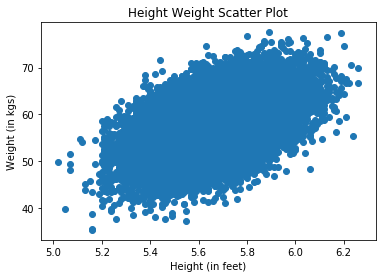

In [12]:
# introducing the matplotlib package which lets us plot charts, graphs in Python
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(df['height'], df['weight'])
plt.title('Height Weight Scatter Plot')
plt.xlabel('Height (in feet)')
plt.ylabel('Weight (in kgs)')
plt.show()

## Using A Linear Regression Model from scipy.stats

In [13]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(df['height'], df['weight'])
print("Slope: "+"{:.4f}".format(slope))
print("Intercept: "+"{:.4f}".format(intercept))

Slope: 16.7835
Intercept: -37.4543


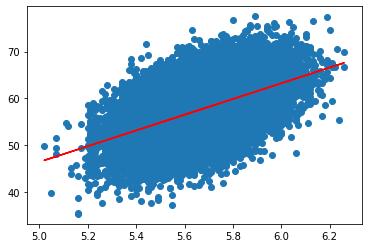

In [14]:
import matplotlib.pyplot as plt

def predict(x):
    return slope * x + intercept

fitLine = predict(df['height'])

plt.scatter(df['height'], df['weight'])
plt.plot(df['height'], fitLine, c='r')
plt.show()

In [15]:
r_value ** 2

0.2528628931559556

# Problem 2: Resume Shortlisting using scikit-learn Decision Tree
#### Source: [scikit-learn](https://scikit-learn.org/stable/modules/tree.html#mathematical-formulation)

**Decision Trees (DTs)** are a non-parametric supervised learning method used for **[Classification](https://scikit-learn.org/stable/modules/tree.html#tree-classification)** and **[Regression](https://scikit-learn.org/stable/modules/tree.html#tree-regression)**. The goal is to create a model that predicts the value of a
target variable by learning simple decision rules inferred from the data features.

For instance, in the example below, decision trees learn from data to approximate a sine curve with a set of if-then-else decision rules. The deeper the tree, the more complex the decision rules and the fitter the model.

<img src="assets/DT.png" width=500px />

Some advantages of decision trees are:

- Simple to understand and to interpret. Trees can be visualised.

- Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.

- The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.

- Able to handle both numerical and categorical data. Other techniqued are usually specialised in analysing datasets that have only one type of variable.
  
- Able to handle multi-output problems.

- Uses a **white box model.** If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a **black box model** (e.g., in an artificial neural network), results may be more difficult to interpret.

- Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.

- Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.


The disadvantages of decision trees include:

- Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. Mechanisms such as pruning (not currently supported), setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.

- Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.

- The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree.  This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.

- There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.

- Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.


In [16]:
import numpy as np
import pandas as pd
from sklearn import tree

input_file = "./resume_shortlist.csv"
df = pd.read_csv(input_file, header = 0)

df.head()

,Degree,Grade,Work Experience,Referral,Shortlisted
0,BTech,50,4,N,N
1,MTech,40,4,N,N
2,MTech,95,5,N,Y
3,BTech,80,4,N,Y
4,MTech,60,5,N,Y


In [17]:
d = {'Y': 1, 'N': 0}
df['Shortlisted'] = df['Shortlisted'].map(d)
df['Referral'] = df['Referral'].map(d)

d = {'BTech': 0, 'MTech': 1}
df['Degree'] = df['Degree'].map(d)

df.head()

,Degree,Grade,Work Experience,Referral,Shortlisted
0,0,50,4,0,0
1,1,40,4,0,0
2,1,95,5,0,1
3,0,80,4,0,1
4,1,60,5,0,1


In [18]:
features = list(df.columns[:4])
features

['Degree', 'Grade', 'Work Experience', 'Referral']

In [19]:
y = df["Shortlisted"]
X = df[features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

In [20]:
print(clf.predict([[1, 90, 3, 1]]))

[1]


In [21]:
print(clf.predict([[0, 30, 5, 0]]))

[0]


[Text(167.40000000000003, 190.26, 'X[1] <= 67.5\ngini = 0.499\nsamples = 19\nvalue = [10, 9]'),
 Text(66.96000000000001, 135.9, 'X[1] <= 55.0\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(33.480000000000004, 81.53999999999999, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(100.44000000000001, 81.53999999999999, 'X[2] <= 7.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(66.96000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(133.92000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(267.84000000000003, 135.9, 'X[2] <= 9.0\ngini = 0.397\nsamples = 11\nvalue = [3, 8]'),
 Text(234.36, 81.53999999999999, 'X[2] <= 2.0\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(200.88000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(267.84000000000003, 27.180000000000007, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(301.32000000000005, 81.53999999999999, 'gini = 0.0\nsamples = 2\nvalu

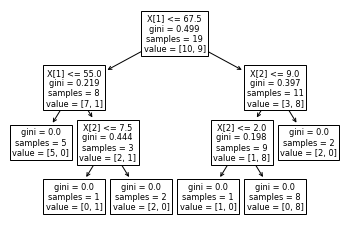

In [22]:
tree.plot_tree(clf.fit(X,y)) 

D:\Programs\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


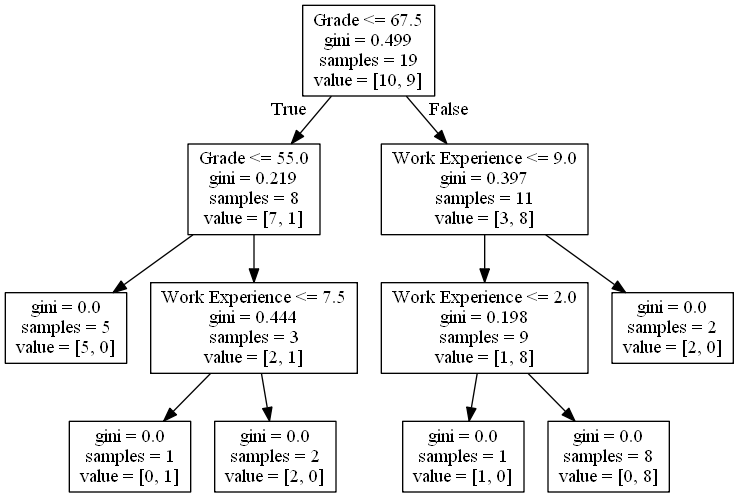

In [23]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())  